# 0. Import Dependencies and Pretrained Model

In [6]:
!pip install tensorflow_hub

In [7]:
import tensorflow_hub as hub
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [8]:
model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

# 1. Preprocess Image and Load

In [24]:
import os
print(os.listdir("C:\\Users\\anshi\\Downloads"))

['13_lims_rcast.pdf', '1_v-model.png', '22-6702.pptx', '22-6714.pptx', 'a325104-015(2022).pdf', 'Adobe Scan 01 Mar 2025.pdf', 'Agile-Development.png', 'AIPCP Article Template.docx', 'All PDF Maker 20241124 08.49.42.pdf', 'Amazon Sale Report (1).csv', 'Amazon Sale Report.csv', 'Amazon Sale Report1.csv', 'amazon1 (1) 1.ipynb', 'amazon1 (1).ipynb', 'amazon1 (2).ipynb', 'amazon1.ipynb', 'Amox-CV-625.jpg', 'Anaconda3-2024.10-1-Windows-x86_64.exe', 'Artificial Intelligence vs Augmented Intelligence_EN.pdf', 'ArtificialIntelligenceFundamentals_Badge20241126-27-s7b4f6.pdf', 'aspirin-dispersible-tablets.jpg', 'BDA 1-4.pdf', 'bigbang2.png', 'CAS_31122022_27442339_2127271.pdf', 'Chapter2 CN Student Module (1).pdf', 'Chapter3 CN Part1.pdf', 'Chapter3 CN Part2.pdf', 'ChatGPT Image Mar 29, 2025, 08_10_33 PM.png', 'ChatGPT Image Mar 31, 2025, 04_17_06 PM.png', 'ChromeSetup.exe', 'claw_king.apk', 'CN Chapter1 Student Module.pdf', 'CN_Unit_3_(1)[1].pdf', 'Computer_Networks_imp_questions[1].docx', 'cons

In [26]:
from PIL import Image
def load_image(img_path):
    try:
        # Check format using PIL
        Image.open(img_path).verify()
        
        img = tf.io.read_file(img_path)
        img = tf.image.decode_image(img, channels=3)
        img = tf.image.convert_image_dtype(img, tf.float32)
        img = img[tf.newaxis, :]
        return img
    except Exception as e:
        print(f"Error loading image: {e}")
        return None


In [30]:
content_image = load_image("C:\\Users\\anshi\\Downloads\\profile.jfif")
style_image = load_image("C:\\Users\\anshi\\Downloads\\monet_fixed.jpg")  


# 2. Visualize Output

In [32]:
content_image.shape

TensorShape([1, 1000, 1000, 3])

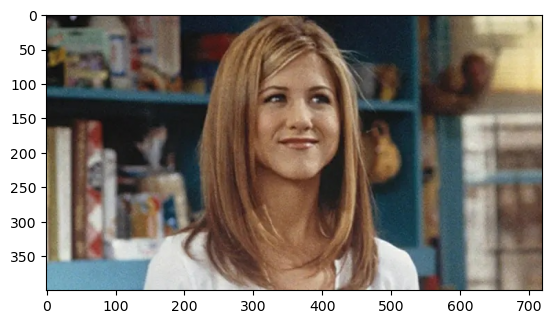

In [34]:
plt.imshow(np.squeeze(style_image))
plt.show()

# 3. Stylize Image

In [36]:
stylized_image = model(tf.constant(content_image), tf.constant(style_image))[0]

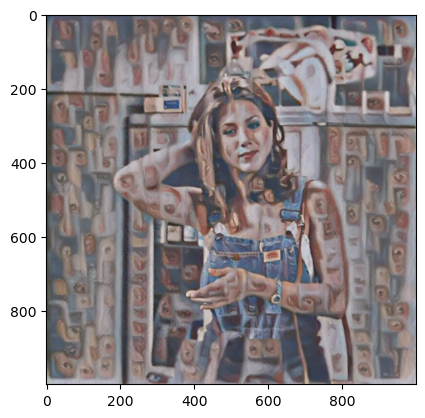

In [37]:
plt.imshow(np.squeeze(stylized_image))
plt.show()

In [40]:
cv2.imwrite('generated_img.jpg', cv2.cvtColor(np.squeeze(stylized_image)*255, cv2.COLOR_BGR2RGB))

True